In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import cv2

In [ ]:
!unzip -q /content/drive/MyDrive/train.zip

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16(include_top=False, input_shape=(150,150,3))

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
for i in vgg.layers:
  print(i.name,i.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
for i in vgg.layers:
  i.trainable = False

In [ ]:
for i in vgg.layers:
  print(i.name,i.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
df = pd.DataFrame(columns = ['filename','label'])
df['filename'] = os.listdir('/content/train')
df['label'] = df['filename'].str.split('.',expand = True)[0]
df

,filename,label
0,cat.3813.jpg,cat
1,cat.8154.jpg,cat
2,cat.4013.jpg,cat
3,cat.10730.jpg,cat
4,cat.12268.jpg,cat
...,...,...
24995,cat.8612.jpg,cat
24996,cat.3486.jpg,cat
24997,cat.7646.jpg,cat
24998,cat.5117.jpg,cat


In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
!mv /content/kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:38<00:00, 23.0MB/s]
100% 812M/812M [00:38<00:00, 22.3MB/s]


In [ ]:
!unzip -q /content/dogs-vs-cats.zip

In [ ]:
!rm /content/train.zip /content/sampleSubmission.csv

In [ ]:
!unzip -q /content/test1.zip

In [ ]:
!rm /content/test1.zip

In [ ]:
!rm /content/dogs-vs-cats.zip

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split = 0.1)

In [ ]:
batch_size = 128

In [ ]:
train = idg.flow_from_dataframe(dataframe=df,
                                directory='/content/train',
                                x_col = 'filename',
                                y_col = 'label',
                                target_size = (150,150),
                                batch_size = batch_size,
                                subset = 'training')

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
val = idg.flow_from_dataframe(df,
                                directory='/content/train',
                                x_col = 'filename',
                                y_col = 'label',
                                target_size = (150,150),
                                batch_size = batch_size,
                                subset = 'validation')

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
flat = tf.keras.layers.Flatten()(vgg.output)
dense = tf.keras.layers.Dense(128,activation = 'relu')(flat)
output = tf.keras.layers.Dense(2,activation = 'softmax')(dense)

In [ ]:
final_model = tf.keras.models.Model(inputs = [vgg.input], outputs = [output])

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

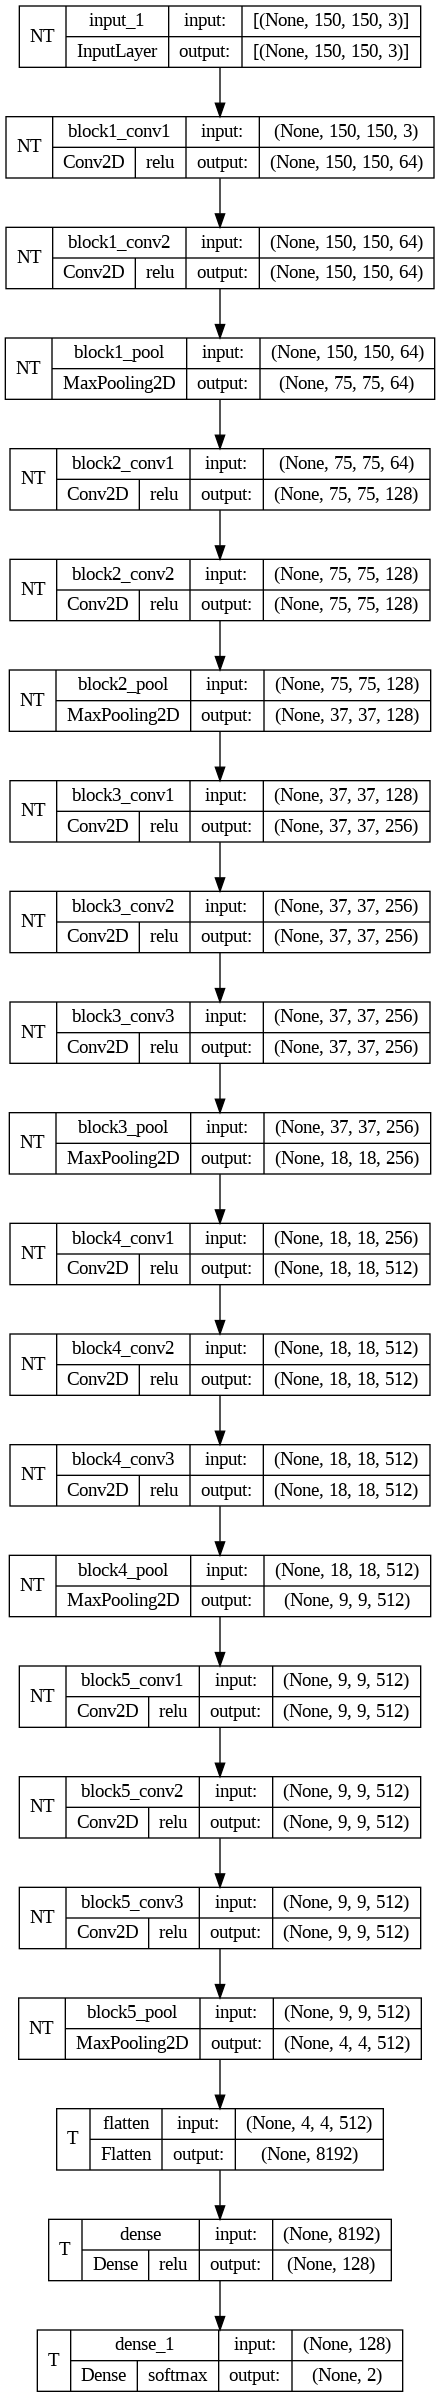

In [ ]:
tf.keras.utils.plot_model(final_model,
                          show_shapes = True,
                          show_layer_names = True,
                          show_layer_activations = True,
                          show_trainable = True)

In [ ]:
final_model.compile(tf.keras.optimizers.SGD(),
                    loss = tf.keras.losses.CategoricalCrossentropy(),
                    metrics = ['accuracy'])

In [ ]:
final_model.fit(train,epochs=15,
                batch_size = batch_size,
                validation_data = val)

Epoch 1/15
176/176 [==============================] - 101s 499ms/step - loss: 6.5131 - accuracy: 0.9302 - val_loss: 0.0784 - val_accuracy: 0.9692
Epoch 2/15
176/176 [==============================] - 69s 390ms/step - loss: 0.0705 - accuracy: 0.9731 - val_loss: 0.0708 - val_accuracy: 0.9724
Epoch 3/15
176/176 [==============================] - 68s 388ms/step - loss: 0.0558 - accuracy: 0.9786 - val_loss: 0.0733 - val_accuracy: 0.9716
Epoch 4/15
176/176 [==============================] - 69s 390ms/step - loss: 0.0448 - accuracy: 0.9834 - val_loss: 0.0743 - val_accuracy: 0.9728
Epoch 5/15
176/176 [==============================] - 72s 406ms/step - loss: 0.0355 - accuracy: 0.9856 - val_loss: 0.0805 - val_accuracy: 0.9744
Epoch 6/15
176/176 [==============================] - 68s 389ms/step - loss: 0.0272 - accuracy: 0.9888 - val_loss: 0.0842 - val_accuracy: 0.9744
Epoch 7/15
176/176 [==============================] - 70s 395ms/step - loss: 0.0207 - accuracy: 0.9914 - val_loss: 0.0955 - val_a

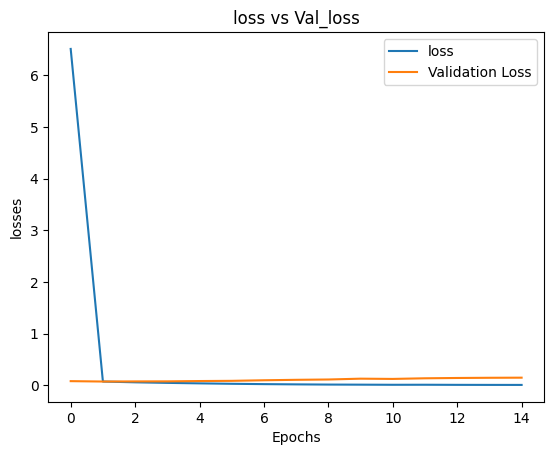

In [ ]:
plt.plot(final_model.history.history['loss'],label = 'loss')
plt.plot(final_model.history.history['val_loss'],label = 'Validation Loss')
plt.title('loss vs Val_loss')
plt.xlabel('Epochs')
plt.ylabel('losses')
plt.legend()
plt.show()

In [ ]:
def image_prediction(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  image = tf.keras.applications.vgg16.preprocess_input(image)
  image = cv2.resize(image,(150,150))
  image = np.expand_dims(image,axis = 0)
  result = final_model.predict(image,verbose = 0)
  if result[0][0]>result[0][1]:
    plt.title('Cat')
  else:
    plt.title('Dog')

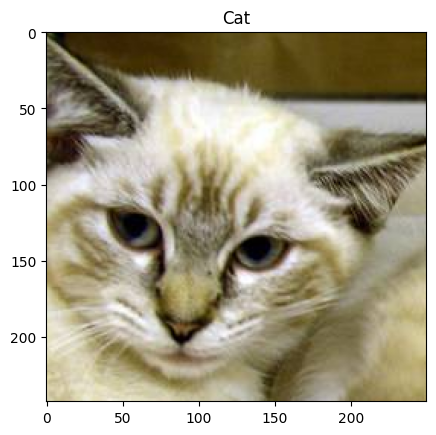

In [ ]:
image_prediction('/content/test1/1001.jpg')